### <p style="text-align: right;"> &#9989; Nathan Kurt.</p>

#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>


# Day 15 In-class Assignment: Analyzing Flint Water Data

<img src="https://www.gannett-cdn.com/-mm-/2e56892f6a349ad47192b530425d443fb365e5e9/r=x1803&c=3200x1800/https/media.gannett-cdn.com/35547428001/35547428001_5552318734001_5552307433001-vs.jpg?pubId=35547428001" width=450px>

## Goals for today's in-class project

* Use Pandas to select subsets of data 
* Use Pandas and matplotlib to make plots
* Use all of this to get more serious about data science! 

## Assignment instructions

Work with your group to complete this assignment. At the end of the assignment, you'll be asked to save one of your plots as a PDF. You should upload that plot along with your notebook. The assignment is due at the end of class.

This project might look like a lot at first glance, but it should give you a lot of opportunities to learn how to interact with Pandas and analyze data. Be sure to look through the entire notebook to be sure that you see the entire content and make sure you try to pace yourself in class.

#### Remember that is it important that you practice how to find answers to your coding questions; try these for some of the content in this notebook:

* The [Pandas website](http://pandas.pydata.org/)
* [10-minute Panda Tutorial](http://pandas.pydata.org/pandas-docs/stable/10min.html) - a good place to get started with Pandas
* [The Pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html) - the pyplot tutorial.  A good place to get started.
* [A summary of pyplot commands](http://matplotlib.org/api/pyplot_summary.html) - more extensive documentation on pyplot.
* [Python comparison operators](http://www.tutorialspoint.com/python/comparison_operators_example.htm)

If you find some websites that you really like, be sure to share with your classmates on Slack.

___

Today we will embark on our first major **data science** project. We will primarly use Pandas for this. 

The data set we will use is real; it comes from the Flint water crisis that first made the new in 2014, just down the road from where we are. In fact, it was only in April of this year (2018) that the Governor of Michigan stated that lead levels are now within the federal safety limits. However, Flint still has many lead service lines that still need to be replaced.

We will analyze the data ourselves and come up with conclusions and policy decisions based on what we find. The data is real, so it will be imperfect. It is important to learn to handle real-world data. The process of doing real data science typically follows these steps:

1. **Inspecting**: you should *always* look at your data before you attempt to do anything. If you are using Pandas you can simply look at your dataframe using shift-enter in a cell with the name of the dataframe; Pandas will nicely format that to look like a spreadsheet.
2. **Cleaning**: you will probably find problems in your data set, such as missing values or values that don't make sense. You will need to remove those from the data set, and you can use Pandas operations for removing rows and/or columns. 
3. **Transforming**: it is likely that the data has come to you in some form that you can't immediately use and you will need to transform it in some way. The transformation is very problem dependent, but might include changing the units (e.g., multiplying a column by a conversation factor), creating a new quantity from others (e.g., adding two columns together to create a new column) or removing cases that aren't of interest (e.g., grouping by a specific feature). 
4. **Modeling**: finally you can get to the fun part - thinking about what your data is telling you! There are too many techniques for data modeling to list here, but you have already seen one example: looking for correlations in the Great Lake levels by plotting the depth of one lake versus another.

**Talk through each of these four steps with your group members, create a markdown cell below, and write some examples that you have seen so far in class or experiences you've had in other classes or outside of class** (e.g., using the Great Lakes levels data).


*Our group discussed the data science steps and....*
___

## Creating subsets of data: Pandas dataframe manipulation

Many datasets come with much more than you need for your goal; it's often useful to get some subset of data in a Pandas data frame.  Typical situations include:

* you want all rows in the data frame where a particular quantity is above or below a certain value
* you want a range of rows (rows 1-10, for example)
* you only want one or two of the columns

In general you then use this subset of the data for further analysis or visualization.  

In the following cells, we're going to walk you through a variety of ways of getting the data you want out of a Pandas data frame.

Now, we're going to load a dataset into a dataframe with Pandas.

In the following cells, we're going to walk you through a variety of ways of getting the data you want out of a Pandas data frame. **Take notice of the new import command for importing Pandas!**

In [1]:
# This cell loads up the data and sets up a few modules.

# makes matplotlib (and pandas) plots show up in the notebook
%matplotlib inline

# the following two lines make all plots show up in formats that are high-resolution
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# actually import the Pandas module
import pandas as pd

# create a data frame called flint_data that has everything we used in class. (This allows you to see what the raw data looks like, but you will more often read directly from a file.)
flint_data = pd.read_json("""[{"SampleID":1,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":0.344,"Pb Bottle 2 (ppb) - 45 secs flushing":0.226,"Pb Bottle 3 (ppb) - 2 mins flushing":0.145},{"SampleID":2,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":8.133,"Pb Bottle 2 (ppb) - 45 secs flushing":10.77,"Pb Bottle 3 (ppb) - 2 mins flushing":2.761},{"SampleID":4,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.111,"Pb Bottle 2 (ppb) - 45 secs flushing":0.11,"Pb Bottle 3 (ppb) - 2 mins flushing":0.123},{"SampleID":5,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":8.007,"Pb Bottle 2 (ppb) - 45 secs flushing":7.446,"Pb Bottle 3 (ppb) - 2 mins flushing":3.384},{"SampleID":6,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":1.951,"Pb Bottle 2 (ppb) - 45 secs flushing":0.048,"Pb Bottle 3 (ppb) - 2 mins flushing":0.035},{"SampleID":7,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":7.2,"Pb Bottle 2 (ppb) - 45 secs flushing":1.4,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":8,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":40.63,"Pb Bottle 2 (ppb) - 45 secs flushing":9.726,"Pb Bottle 3 (ppb) - 2 mins flushing":6.132},{"SampleID":9,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.1,"Pb Bottle 2 (ppb) - 45 secs flushing":2.5,"Pb Bottle 3 (ppb) - 2 mins flushing":0.1},{"SampleID":12,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":10.6,"Pb Bottle 2 (ppb) - 45 secs flushing":1.038,"Pb Bottle 3 (ppb) - 2 mins flushing":1.294},{"SampleID":13,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":6.2,"Pb Bottle 2 (ppb) - 45 secs flushing":4.2,"Pb Bottle 3 (ppb) - 2 mins flushing":2.3},{"SampleID":15,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":4.358,"Pb Bottle 2 (ppb) - 45 secs flushing":0.822,"Pb Bottle 3 (ppb) - 2 mins flushing":0.147},{"SampleID":16,"Zip Code":48505,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":24.37,"Pb Bottle 2 (ppb) - 45 secs flushing":8.796,"Pb Bottle 3 (ppb) - 2 mins flushing":4.347},{"SampleID":17,"Zip Code":48505,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":6.609,"Pb Bottle 2 (ppb) - 45 secs flushing":5.752,"Pb Bottle 3 (ppb) - 2 mins flushing":1.433},{"SampleID":18,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":4.062,"Pb Bottle 2 (ppb) - 45 secs flushing":1.099,"Pb Bottle 3 (ppb) - 2 mins flushing":1.085},{"SampleID":19,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.484,"Pb Bottle 2 (ppb) - 45 secs flushing":0.72,"Pb Bottle 3 (ppb) - 2 mins flushing":0.565},{"SampleID":20,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.438,"Pb Bottle 2 (ppb) - 45 secs flushing":1.046,"Pb Bottle 3 (ppb) - 2 mins flushing":0.511},{"SampleID":21,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.29,"Pb Bottle 2 (ppb) - 45 secs flushing":0.243,"Pb Bottle 3 (ppb) - 2 mins flushing":0.225},{"SampleID":22,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":0.548,"Pb Bottle 2 (ppb) - 45 secs flushing":0.622,"Pb Bottle 3 (ppb) - 2 mins flushing":0.361},{"SampleID":23,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":3.131,"Pb Bottle 2 (ppb) - 45 secs flushing":0.674,"Pb Bottle 3 (ppb) - 2 mins flushing":0.683},{"SampleID":24,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":120,"Pb Bottle 2 (ppb) - 45 secs flushing":239.7,"Pb Bottle 3 (ppb) - 2 mins flushing":29.71},{"SampleID":25,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.911,"Pb Bottle 2 (ppb) - 45 secs flushing":0.406,"Pb Bottle 3 (ppb) - 2 mins flushing":0.237},{"SampleID":26,"Zip Code":48505,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":16.52,"Pb Bottle 2 (ppb) - 45 secs flushing":10.26,"Pb Bottle 3 (ppb) - 2 mins flushing":2.762},{"SampleID":27,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.984,"Pb Bottle 2 (ppb) - 45 secs flushing":1.13,"Pb Bottle 3 (ppb) - 2 mins flushing":0.712},{"SampleID":28,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":5.367,"Pb Bottle 2 (ppb) - 45 secs flushing":2.474,"Pb Bottle 3 (ppb) - 2 mins flushing":1.616},{"SampleID":29,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":5.5,"Pb Bottle 2 (ppb) - 45 secs flushing":8.4,"Pb Bottle 3 (ppb) - 2 mins flushing":2.4},{"SampleID":30,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.639,"Pb Bottle 2 (ppb) - 45 secs flushing":0.223,"Pb Bottle 3 (ppb) - 2 mins flushing":0.194},{"SampleID":31,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":6.087,"Pb Bottle 2 (ppb) - 45 secs flushing":28.87,"Pb Bottle 3 (ppb) - 2 mins flushing":2.13,"Notes":"*house sampled twice"},{"SampleID":31,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":10.32,"Pb Bottle 2 (ppb) - 45 secs flushing":13.47,"Pb Bottle 3 (ppb) - 2 mins flushing":18.19,"Notes":"*house sampled twice"},{"SampleID":33,"Zip Code":48503,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":66.88,"Pb Bottle 2 (ppb) - 45 secs flushing":2.662,"Pb Bottle 3 (ppb) - 2 mins flushing":2.082},{"SampleID":34,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":20.41,"Pb Bottle 2 (ppb) - 45 secs flushing":3.543,"Pb Bottle 3 (ppb) - 2 mins flushing":2.344},{"SampleID":35,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":109.6,"Pb Bottle 2 (ppb) - 45 secs flushing":80.47,"Pb Bottle 3 (ppb) - 2 mins flushing":94.52},{"SampleID":36,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":5.06,"Pb Bottle 2 (ppb) - 45 secs flushing":3.406,"Pb Bottle 3 (ppb) - 2 mins flushing":4.088},{"SampleID":37,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":2.774,"Pb Bottle 2 (ppb) - 45 secs flushing":0.21,"Pb Bottle 3 (ppb) - 2 mins flushing":0.264},{"SampleID":38,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":4.453,"Pb Bottle 2 (ppb) - 45 secs flushing":3.679,"Pb Bottle 3 (ppb) - 2 mins flushing":3.523},{"SampleID":39,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":0.4,"Pb Bottle 2 (ppb) - 45 secs flushing":0.3,"Pb Bottle 3 (ppb) - 2 mins flushing":0.7},{"SampleID":40,"Zip Code":48529,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.974,"Pb Bottle 2 (ppb) - 45 secs flushing":0.142,"Pb Bottle 3 (ppb) - 2 mins flushing":0.118},{"SampleID":41,"Zip Code":48505,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":3.228,"Pb Bottle 2 (ppb) - 45 secs flushing":2.534,"Pb Bottle 3 (ppb) - 2 mins flushing":2.222},{"SampleID":42,"Zip Code":48505,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":12.55,"Pb Bottle 2 (ppb) - 45 secs flushing":4.132,"Pb Bottle 3 (ppb) - 2 mins flushing":0.12},{"SampleID":43,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":0.501,"Pb Bottle 2 (ppb) - 45 secs flushing":0.156,"Pb Bottle 3 (ppb) - 2 mins flushing":15.14},{"SampleID":44,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":2.448,"Pb Bottle 2 (ppb) - 45 secs flushing":0.373,"Pb Bottle 3 (ppb) - 2 mins flushing":0.288},{"SampleID":45,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":5.508,"Pb Bottle 2 (ppb) - 45 secs flushing":5.157,"Pb Bottle 3 (ppb) - 2 mins flushing":2.621},{"SampleID":46,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":1.293,"Pb Bottle 2 (ppb) - 45 secs flushing":0.441,"Pb Bottle 3 (ppb) - 2 mins flushing":0.281},{"SampleID":47,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":4.699,"Pb Bottle 2 (ppb) - 45 secs flushing":1.395,"Pb Bottle 3 (ppb) - 2 mins flushing":0.329},{"SampleID":48,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":6.093,"Pb Bottle 2 (ppb) - 45 secs flushing":2.682,"Pb Bottle 3 (ppb) - 2 mins flushing":1.458},{"SampleID":49,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":0.8,"Pb Bottle 2 (ppb) - 45 secs flushing":0.8,"Pb Bottle 3 (ppb) - 2 mins flushing":0.5},{"SampleID":50,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.626,"Pb Bottle 2 (ppb) - 45 secs flushing":1.332,"Pb Bottle 3 (ppb) - 2 mins flushing":0.327},{"SampleID":51,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":2.576,"Pb Bottle 2 (ppb) - 45 secs flushing":2.852,"Pb Bottle 3 (ppb) - 2 mins flushing":1.48},{"SampleID":52,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.362,"Pb Bottle 2 (ppb) - 45 secs flushing":0.467,"Pb Bottle 3 (ppb) - 2 mins flushing":0.339},{"SampleID":53,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.585,"Pb Bottle 2 (ppb) - 45 secs flushing":0.494,"Pb Bottle 3 (ppb) - 2 mins flushing":1.232},{"SampleID":54,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":3.058,"Pb Bottle 2 (ppb) - 45 secs flushing":1.808,"Pb Bottle 3 (ppb) - 2 mins flushing":1.169},{"SampleID":55,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":2.423,"Pb Bottle 2 (ppb) - 45 secs flushing":0.393,"Pb Bottle 3 (ppb) - 2 mins flushing":0.373},{"SampleID":56,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":30.91,"Pb Bottle 2 (ppb) - 45 secs flushing":42.58,"Pb Bottle 3 (ppb) - 2 mins flushing":44.6},{"SampleID":57,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":4.47,"Pb Bottle 2 (ppb) - 45 secs flushing":3.649,"Pb Bottle 3 (ppb) - 2 mins flushing":1},{"SampleID":58,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.172,"Pb Bottle 2 (ppb) - 45 secs flushing":1.76,"Pb Bottle 3 (ppb) - 2 mins flushing":1.44},{"SampleID":59,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":1.8,"Pb Bottle 2 (ppb) - 45 secs flushing":0.5,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":63,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":0.965,"Pb Bottle 2 (ppb) - 45 secs flushing":0.166,"Pb Bottle 3 (ppb) - 2 mins flushing":0.319},{"SampleID":65,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":7.636,"Pb Bottle 2 (ppb) - 45 secs flushing":5.206,"Pb Bottle 3 (ppb) - 2 mins flushing":9.239},{"SampleID":66,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":3.158,"Pb Bottle 2 (ppb) - 45 secs flushing":1.948,"Pb Bottle 3 (ppb) - 2 mins flushing":2.802},{"SampleID":67,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":105.3,"Pb Bottle 2 (ppb) - 45 secs flushing":12.84,"Pb Bottle 3 (ppb) - 2 mins flushing":4.534},{"SampleID":68,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":4.476,"Pb Bottle 2 (ppb) - 45 secs flushing":0.355,"Pb Bottle 3 (ppb) - 2 mins flushing":0.334},{"SampleID":69,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.828,"Pb Bottle 2 (ppb) - 45 secs flushing":6.694,"Pb Bottle 3 (ppb) - 2 mins flushing":20.99},{"SampleID":71,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":2.481,"Pb Bottle 2 (ppb) - 45 secs flushing":3.86,"Pb Bottle 3 (ppb) - 2 mins flushing":24.64},{"SampleID":72,"Zip Code":48507,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":11.52,"Pb Bottle 2 (ppb) - 45 secs flushing":0.288,"Pb Bottle 3 (ppb) - 2 mins flushing":0.215},{"SampleID":73,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":3.784,"Pb Bottle 2 (ppb) - 45 secs flushing":0.292,"Pb Bottle 3 (ppb) - 2 mins flushing":0.258},{"SampleID":74,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.344,"Pb Bottle 2 (ppb) - 45 secs flushing":0.729,"Pb Bottle 3 (ppb) - 2 mins flushing":1.226},{"SampleID":75,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":11.93,"Pb Bottle 2 (ppb) - 45 secs flushing":9.645,"Pb Bottle 3 (ppb) - 2 mins flushing":3.514},{"SampleID":76,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":10.96,"Pb Bottle 2 (ppb) - 45 secs flushing":7.744,"Pb Bottle 3 (ppb) - 2 mins flushing":4.16},{"SampleID":77,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":3.341,"Pb Bottle 2 (ppb) - 45 secs flushing":0.555,"Pb Bottle 3 (ppb) - 2 mins flushing":0.917},{"SampleID":78,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.229,"Pb Bottle 2 (ppb) - 45 secs flushing":1.192,"Pb Bottle 3 (ppb) - 2 mins flushing":0.218},{"SampleID":79,"Zip Code":48503,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":6.3,"Pb Bottle 2 (ppb) - 45 secs flushing":1.1,"Pb Bottle 3 (ppb) - 2 mins flushing":0.3,"Notes":"*house sampled twice"},{"SampleID":79,"Zip Code":48503,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":5.153,"Pb Bottle 2 (ppb) - 45 secs flushing":0.385,"Pb Bottle 3 (ppb) - 2 mins flushing":0.322,"Notes":"*house sampled twice"},{"SampleID":80,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":6.054,"Pb Bottle 2 (ppb) - 45 secs flushing":0.927,"Pb Bottle 3 (ppb) - 2 mins flushing":0.676},{"SampleID":82,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":31.14,"Pb Bottle 2 (ppb) - 45 secs flushing":4.73,"Pb Bottle 3 (ppb) - 2 mins flushing":3.188},{"SampleID":83,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":102.7,"Pb Bottle 2 (ppb) - 45 secs flushing":9.894,"Pb Bottle 3 (ppb) - 2 mins flushing":3.133},{"SampleID":84,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":1.38,"Pb Bottle 2 (ppb) - 45 secs flushing":3.734,"Pb Bottle 3 (ppb) - 2 mins flushing":0.524},{"SampleID":85,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":1.132,"Pb Bottle 2 (ppb) - 45 secs flushing":2.17,"Pb Bottle 3 (ppb) - 2 mins flushing":0.465},{"SampleID":87,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":3.232,"Pb Bottle 2 (ppb) - 45 secs flushing":2.989,"Pb Bottle 3 (ppb) - 2 mins flushing":1.927},{"SampleID":88,"Zip Code":48532,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":0.507,"Pb Bottle 2 (ppb) - 45 secs flushing":2.315,"Pb Bottle 3 (ppb) - 2 mins flushing":0.231},{"SampleID":90,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":8.561,"Pb Bottle 2 (ppb) - 45 secs flushing":5.141,"Pb Bottle 3 (ppb) - 2 mins flushing":4.724},{"SampleID":91,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":9.997,"Pb Bottle 2 (ppb) - 45 secs flushing":0.983,"Pb Bottle 3 (ppb) - 2 mins flushing":0.611},{"SampleID":92,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":4.152,"Pb Bottle 2 (ppb) - 45 secs flushing":0.758,"Pb Bottle 3 (ppb) - 2 mins flushing":0.433},{"SampleID":93,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":75.82,"Pb Bottle 2 (ppb) - 45 secs flushing":11.65,"Pb Bottle 3 (ppb) - 2 mins flushing":3.942},{"SampleID":95,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":138.8,"Pb Bottle 2 (ppb) - 45 secs flushing":2.745,"Pb Bottle 3 (ppb) - 2 mins flushing":0.797},{"SampleID":96,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.8,"Pb Bottle 2 (ppb) - 45 secs flushing":0.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":97,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":7.244,"Pb Bottle 2 (ppb) - 45 secs flushing":1051,"Pb Bottle 3 (ppb) - 2 mins flushing":1.328},{"SampleID":98,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":1.621,"Pb Bottle 2 (ppb) - 45 secs flushing":0.3,"Pb Bottle 3 (ppb) - 2 mins flushing":0.238},{"SampleID":99,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.032,"Pb Bottle 2 (ppb) - 45 secs flushing":0.363,"Pb Bottle 3 (ppb) - 2 mins flushing":0.216},{"SampleID":100,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":0.866,"Pb Bottle 2 (ppb) - 45 secs flushing":0.292,"Pb Bottle 3 (ppb) - 2 mins flushing":0.269},{"SampleID":101,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":2.525,"Pb Bottle 2 (ppb) - 45 secs flushing":0.59,"Pb Bottle 3 (ppb) - 2 mins flushing":0.438},{"SampleID":102,"Zip Code":48505,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":9.408,"Pb Bottle 2 (ppb) - 45 secs flushing":4.444,"Pb Bottle 3 (ppb) - 2 mins flushing":3.935},{"SampleID":103,"Zip Code":48505,"Ward":0,"Pb Bottle 1 (ppb) - First Draw":0.739,"Pb Bottle 2 (ppb) - 45 secs flushing":4.883,"Pb Bottle 3 (ppb) - 2 mins flushing":0.953},{"SampleID":104,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":0.9,"Pb Bottle 2 (ppb) - 45 secs flushing":0.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.1},{"SampleID":105,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":1.403,"Pb Bottle 2 (ppb) - 45 secs flushing":0.142,"Pb Bottle 3 (ppb) - 2 mins flushing":0.121},{"SampleID":106,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":5.655,"Pb Bottle 2 (ppb) - 45 secs flushing":5.882,"Pb Bottle 3 (ppb) - 2 mins flushing":10.66},{"SampleID":107,"Zip Code":48505,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":31.06,"Pb Bottle 2 (ppb) - 45 secs flushing":8.578,"Pb Bottle 3 (ppb) - 2 mins flushing":3.176},{"SampleID":108,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.469,"Pb Bottle 2 (ppb) - 45 secs flushing":0.291,"Pb Bottle 3 (ppb) - 2 mins flushing":0.25},{"SampleID":109,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":23.85,"Pb Bottle 2 (ppb) - 45 secs flushing":2.301,"Pb Bottle 3 (ppb) - 2 mins flushing":1.62},{"SampleID":110,"Zip Code":48505,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":9.766,"Pb Bottle 2 (ppb) - 45 secs flushing":11.13,"Pb Bottle 3 (ppb) - 2 mins flushing":7.144},{"SampleID":111,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":4.69,"Pb Bottle 2 (ppb) - 45 secs flushing":0.953,"Pb Bottle 3 (ppb) - 2 mins flushing":0.929},{"SampleID":112,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":4.066,"Pb Bottle 2 (ppb) - 45 secs flushing":5.894,"Pb Bottle 3 (ppb) - 2 mins flushing":4.76},{"SampleID":113,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":0.846,"Pb Bottle 2 (ppb) - 45 secs flushing":0.455,"Pb Bottle 3 (ppb) - 2 mins flushing":0.366},{"SampleID":114,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.054,"Pb Bottle 2 (ppb) - 45 secs flushing":3.978,"Pb Bottle 3 (ppb) - 2 mins flushing":0.355},{"SampleID":115,"Zip Code":48506,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":3.744,"Pb Bottle 2 (ppb) - 45 secs flushing":5.592,"Pb Bottle 3 (ppb) - 2 mins flushing":2.476},{"SampleID":116,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":12.9,"Pb Bottle 2 (ppb) - 45 secs flushing":2.202,"Pb Bottle 3 (ppb) - 2 mins flushing":1.667},{"SampleID":117,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":0.543,"Pb Bottle 2 (ppb) - 45 secs flushing":0.183,"Pb Bottle 3 (ppb) - 2 mins flushing":0.162},{"SampleID":118,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":6.877,"Pb Bottle 2 (ppb) - 45 secs flushing":2.984,"Pb Bottle 3 (ppb) - 2 mins flushing":2.201},{"SampleID":119,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":0.552,"Pb Bottle 2 (ppb) - 45 secs flushing":0.19,"Pb Bottle 3 (ppb) - 2 mins flushing":0.205},{"SampleID":121,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":59,"Pb Bottle 2 (ppb) - 45 secs flushing":2.9,"Pb Bottle 3 (ppb) - 2 mins flushing":0.5},{"SampleID":122,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.349,"Pb Bottle 2 (ppb) - 45 secs flushing":0.13,"Pb Bottle 3 (ppb) - 2 mins flushing":0.131},{"SampleID":123,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":4.764,"Pb Bottle 2 (ppb) - 45 secs flushing":1.388,"Pb Bottle 3 (ppb) - 2 mins flushing":1.06},{"SampleID":124,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.832,"Pb Bottle 2 (ppb) - 45 secs flushing":0.284,"Pb Bottle 3 (ppb) - 2 mins flushing":0.214},{"SampleID":125,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.224,"Pb Bottle 2 (ppb) - 45 secs flushing":0.568,"Pb Bottle 3 (ppb) - 2 mins flushing":0.465},{"SampleID":126,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":15.9,"Pb Bottle 2 (ppb) - 45 secs flushing":3.7,"Pb Bottle 3 (ppb) - 2 mins flushing":2.2},{"SampleID":127,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":5.667,"Pb Bottle 2 (ppb) - 45 secs flushing":1.405,"Pb Bottle 3 (ppb) - 2 mins flushing":0.896},{"SampleID":128,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":3.564,"Pb Bottle 2 (ppb) - 45 secs flushing":2.767,"Pb Bottle 3 (ppb) - 2 mins flushing":2.127},{"SampleID":129,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.475,"Pb Bottle 2 (ppb) - 45 secs flushing":0.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.268},{"SampleID":130,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":5.3,"Pb Bottle 2 (ppb) - 45 secs flushing":0.5,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":131,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.166,"Pb Bottle 2 (ppb) - 45 secs flushing":0.736,"Pb Bottle 3 (ppb) - 2 mins flushing":0.269},{"SampleID":132,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.684,"Pb Bottle 2 (ppb) - 45 secs flushing":0.306,"Pb Bottle 3 (ppb) - 2 mins flushing":0.094},{"SampleID":133,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":6.347,"Pb Bottle 2 (ppb) - 45 secs flushing":1.724,"Pb Bottle 3 (ppb) - 2 mins flushing":0.678},{"SampleID":134,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":10.56,"Pb Bottle 2 (ppb) - 45 secs flushing":5.672,"Pb Bottle 3 (ppb) - 2 mins flushing":4.813},{"SampleID":135,"Zip Code":48502,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":2.273,"Pb Bottle 2 (ppb) - 45 secs flushing":2.808,"Pb Bottle 3 (ppb) - 2 mins flushing":3.048},{"SampleID":136,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.571,"Pb Bottle 2 (ppb) - 45 secs flushing":1.265,"Pb Bottle 3 (ppb) - 2 mins flushing":0.316},{"SampleID":137,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":5.402,"Pb Bottle 2 (ppb) - 45 secs flushing":4.196,"Pb Bottle 3 (ppb) - 2 mins flushing":1.945},{"SampleID":138,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":43.19,"Pb Bottle 2 (ppb) - 45 secs flushing":7.688,"Pb Bottle 3 (ppb) - 2 mins flushing":4.39},{"SampleID":139,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":1.492,"Pb Bottle 2 (ppb) - 45 secs flushing":1.409,"Pb Bottle 3 (ppb) - 2 mins flushing":0.378},{"SampleID":140,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":66.24,"Pb Bottle 2 (ppb) - 45 secs flushing":17.75,"Pb Bottle 3 (ppb) - 2 mins flushing":8.815},{"SampleID":141,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.799,"Pb Bottle 2 (ppb) - 45 secs flushing":0.032,"Pb Bottle 3 (ppb) - 2 mins flushing":0.031},{"SampleID":142,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":1.861,"Pb Bottle 2 (ppb) - 45 secs flushing":1.355,"Pb Bottle 3 (ppb) - 2 mins flushing":0.64},{"SampleID":143,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":2.672,"Pb Bottle 2 (ppb) - 45 secs flushing":2.001,"Pb Bottle 3 (ppb) - 2 mins flushing":1.094},{"SampleID":144,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":3.741,"Pb Bottle 2 (ppb) - 45 secs flushing":1.211,"Pb Bottle 3 (ppb) - 2 mins flushing":0.258},{"SampleID":145,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.934,"Pb Bottle 2 (ppb) - 45 secs flushing":0.374,"Pb Bottle 3 (ppb) - 2 mins flushing":0.424},{"SampleID":146,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":27.05,"Pb Bottle 2 (ppb) - 45 secs flushing":0.902,"Pb Bottle 3 (ppb) - 2 mins flushing":0.61},{"SampleID":147,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.174,"Pb Bottle 2 (ppb) - 45 secs flushing":0.291,"Pb Bottle 3 (ppb) - 2 mins flushing":4.055},{"SampleID":148,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.325,"Pb Bottle 2 (ppb) - 45 secs flushing":1.099,"Pb Bottle 3 (ppb) - 2 mins flushing":0.466},{"SampleID":149,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.966,"Pb Bottle 2 (ppb) - 45 secs flushing":0.253,"Pb Bottle 3 (ppb) - 2 mins flushing":0.201},{"SampleID":150,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.959,"Pb Bottle 2 (ppb) - 45 secs flushing":0.438,"Pb Bottle 3 (ppb) - 2 mins flushing":0.448},{"SampleID":151,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.823,"Pb Bottle 2 (ppb) - 45 secs flushing":1.881,"Pb Bottle 3 (ppb) - 2 mins flushing":0.412},{"SampleID":152,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":11.2,"Pb Bottle 2 (ppb) - 45 secs flushing":7.553,"Pb Bottle 3 (ppb) - 2 mins flushing":12.21},{"SampleID":153,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":5.668,"Pb Bottle 2 (ppb) - 45 secs flushing":3.341,"Pb Bottle 3 (ppb) - 2 mins flushing":3.268},{"SampleID":154,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":6.261,"Pb Bottle 2 (ppb) - 45 secs flushing":1.316,"Pb Bottle 3 (ppb) - 2 mins flushing":0.5},{"SampleID":155,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":4.797,"Pb Bottle 2 (ppb) - 45 secs flushing":1.594,"Pb Bottle 3 (ppb) - 2 mins flushing":1.264},{"SampleID":156,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.64,"Pb Bottle 2 (ppb) - 45 secs flushing":0.905,"Pb Bottle 3 (ppb) - 2 mins flushing":0.151},{"SampleID":158,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":8.713,"Pb Bottle 2 (ppb) - 45 secs flushing":2.799,"Pb Bottle 3 (ppb) - 2 mins flushing":50.97},{"SampleID":159,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.544,"Pb Bottle 2 (ppb) - 45 secs flushing":1.099,"Pb Bottle 3 (ppb) - 2 mins flushing":0.498},{"SampleID":161,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.41,"Pb Bottle 2 (ppb) - 45 secs flushing":0.096,"Pb Bottle 3 (ppb) - 2 mins flushing":0.116},{"SampleID":162,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":32.85,"Pb Bottle 2 (ppb) - 45 secs flushing":35.76,"Pb Bottle 3 (ppb) - 2 mins flushing":9.103},{"SampleID":163,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":12.87,"Pb Bottle 2 (ppb) - 45 secs flushing":14.87,"Pb Bottle 3 (ppb) - 2 mins flushing":6.326},{"SampleID":164,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":38.02,"Pb Bottle 2 (ppb) - 45 secs flushing":38.7,"Pb Bottle 3 (ppb) - 2 mins flushing":38.94},{"SampleID":165,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.435,"Pb Bottle 2 (ppb) - 45 secs flushing":8.183,"Pb Bottle 3 (ppb) - 2 mins flushing":1.296},{"SampleID":166,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.997,"Pb Bottle 2 (ppb) - 45 secs flushing":1.867,"Pb Bottle 3 (ppb) - 2 mins flushing":1.512},{"SampleID":167,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":11,"Pb Bottle 2 (ppb) - 45 secs flushing":10.53,"Pb Bottle 3 (ppb) - 2 mins flushing":8.688},{"SampleID":168,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":6.219,"Pb Bottle 2 (ppb) - 45 secs flushing":12.33,"Pb Bottle 3 (ppb) - 2 mins flushing":4.202},{"SampleID":169,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":8.8,"Pb Bottle 2 (ppb) - 45 secs flushing":3.1,"Pb Bottle 3 (ppb) - 2 mins flushing":4.5},{"SampleID":170,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":8.071,"Pb Bottle 2 (ppb) - 45 secs flushing":0.947,"Pb Bottle 3 (ppb) - 2 mins flushing":0.839},{"SampleID":171,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":3.262,"Pb Bottle 2 (ppb) - 45 secs flushing":0.453,"Pb Bottle 3 (ppb) - 2 mins flushing":0.252},{"SampleID":172,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":2.267,"Pb Bottle 2 (ppb) - 45 secs flushing":0.541,"Pb Bottle 3 (ppb) - 2 mins flushing":0.391},{"SampleID":173,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":0.922,"Pb Bottle 2 (ppb) - 45 secs flushing":0.878,"Pb Bottle 3 (ppb) - 2 mins flushing":0.491},{"SampleID":174,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":27.02,"Pb Bottle 2 (ppb) - 45 secs flushing":31.25,"Pb Bottle 3 (ppb) - 2 mins flushing":11.37},{"SampleID":176,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":0.906,"Pb Bottle 2 (ppb) - 45 secs flushing":0.961,"Pb Bottle 3 (ppb) - 2 mins flushing":1.052},{"SampleID":177,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.85,"Pb Bottle 2 (ppb) - 45 secs flushing":6.862,"Pb Bottle 3 (ppb) - 2 mins flushing":0.951},{"SampleID":178,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":1.852,"Pb Bottle 2 (ppb) - 45 secs flushing":0.472,"Pb Bottle 3 (ppb) - 2 mins flushing":0.422},{"SampleID":179,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":5.35,"Pb Bottle 2 (ppb) - 45 secs flushing":1.328,"Pb Bottle 3 (ppb) - 2 mins flushing":0.595},{"SampleID":180,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":25.21,"Pb Bottle 2 (ppb) - 45 secs flushing":4.337,"Pb Bottle 3 (ppb) - 2 mins flushing":1.019},{"SampleID":182,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":15.55,"Pb Bottle 2 (ppb) - 45 secs flushing":3.962,"Pb Bottle 3 (ppb) - 2 mins flushing":1.861},{"SampleID":183,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.793,"Pb Bottle 2 (ppb) - 45 secs flushing":0.533,"Pb Bottle 3 (ppb) - 2 mins flushing":0.391},{"SampleID":184,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":5.068,"Pb Bottle 2 (ppb) - 45 secs flushing":0.683,"Pb Bottle 3 (ppb) - 2 mins flushing":0.489},{"SampleID":185,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":26.64,"Pb Bottle 2 (ppb) - 45 secs flushing":8.878,"Pb Bottle 3 (ppb) - 2 mins flushing":6.619},{"SampleID":186,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.867,"Pb Bottle 2 (ppb) - 45 secs flushing":0.165,"Pb Bottle 3 (ppb) - 2 mins flushing":0.175},{"SampleID":189,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":19.16,"Pb Bottle 2 (ppb) - 45 secs flushing":12.54,"Pb Bottle 3 (ppb) - 2 mins flushing":7.719},{"SampleID":191,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":28.7,"Pb Bottle 2 (ppb) - 45 secs flushing":12.7,"Pb Bottle 3 (ppb) - 2 mins flushing":8.6},{"SampleID":192,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":20.22,"Pb Bottle 2 (ppb) - 45 secs flushing":8.908,"Pb Bottle 3 (ppb) - 2 mins flushing":6.677},{"SampleID":193,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":2.9,"Pb Bottle 2 (ppb) - 45 secs flushing":0.6,"Pb Bottle 3 (ppb) - 2 mins flushing":0.7},{"SampleID":194,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":18.86,"Pb Bottle 2 (ppb) - 45 secs flushing":5.051,"Pb Bottle 3 (ppb) - 2 mins flushing":2.548},{"SampleID":195,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.816,"Pb Bottle 2 (ppb) - 45 secs flushing":0.324,"Pb Bottle 3 (ppb) - 2 mins flushing":0.362},{"SampleID":196,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":118.4,"Pb Bottle 2 (ppb) - 45 secs flushing":40.78,"Pb Bottle 3 (ppb) - 2 mins flushing":39.99},{"SampleID":197,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":27.45,"Pb Bottle 2 (ppb) - 45 secs flushing":0.939,"Pb Bottle 3 (ppb) - 2 mins flushing":0.533},{"SampleID":198,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.2,"Pb Bottle 2 (ppb) - 45 secs flushing":0.1,"Pb Bottle 3 (ppb) - 2 mins flushing":0.1},{"SampleID":200,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":4.681,"Pb Bottle 2 (ppb) - 45 secs flushing":0.755,"Pb Bottle 3 (ppb) - 2 mins flushing":0.456},{"SampleID":201,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":11.57,"Pb Bottle 2 (ppb) - 45 secs flushing":6.08,"Pb Bottle 3 (ppb) - 2 mins flushing":1.782},{"SampleID":202,"Zip Code":48532,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":6.557,"Pb Bottle 2 (ppb) - 45 secs flushing":0.289,"Pb Bottle 3 (ppb) - 2 mins flushing":0.371},{"SampleID":203,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":3.4,"Pb Bottle 2 (ppb) - 45 secs flushing":9.6,"Pb Bottle 3 (ppb) - 2 mins flushing":1.7},{"SampleID":204,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":0.7,"Pb Bottle 2 (ppb) - 45 secs flushing":0.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":205,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":158,"Pb Bottle 2 (ppb) - 45 secs flushing":90.83,"Pb Bottle 3 (ppb) - 2 mins flushing":91.69},{"SampleID":206,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.977,"Pb Bottle 2 (ppb) - 45 secs flushing":0.47,"Pb Bottle 3 (ppb) - 2 mins flushing":0.381},{"SampleID":207,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":8.471,"Pb Bottle 2 (ppb) - 45 secs flushing":4.692,"Pb Bottle 3 (ppb) - 2 mins flushing":1.48},{"SampleID":208,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":11.47,"Pb Bottle 2 (ppb) - 45 secs flushing":23.15,"Pb Bottle 3 (ppb) - 2 mins flushing":7.129},{"SampleID":209,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":5.228,"Pb Bottle 2 (ppb) - 45 secs flushing":2.477,"Pb Bottle 3 (ppb) - 2 mins flushing":1.014},{"SampleID":210,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.956,"Pb Bottle 2 (ppb) - 45 secs flushing":0.196,"Pb Bottle 3 (ppb) - 2 mins flushing":0.157},{"SampleID":211,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":1.671,"Pb Bottle 2 (ppb) - 45 secs flushing":0.405,"Pb Bottle 3 (ppb) - 2 mins flushing":4.721},{"SampleID":212,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":1.152,"Pb Bottle 2 (ppb) - 45 secs flushing":0.708,"Pb Bottle 3 (ppb) - 2 mins flushing":0.282},{"SampleID":213,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.5,"Pb Bottle 2 (ppb) - 45 secs flushing":0.1,"Pb Bottle 3 (ppb) - 2 mins flushing":0.1},{"SampleID":214,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":10.74,"Pb Bottle 2 (ppb) - 45 secs flushing":2.331,"Pb Bottle 3 (ppb) - 2 mins flushing":1.628},{"SampleID":215,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":3.9,"Pb Bottle 2 (ppb) - 45 secs flushing":0.4,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":216,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.149,"Pb Bottle 2 (ppb) - 45 secs flushing":0.368,"Pb Bottle 3 (ppb) - 2 mins flushing":0.333},{"SampleID":217,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.1,"Pb Bottle 2 (ppb) - 45 secs flushing":0.4,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":218,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":7.087,"Pb Bottle 2 (ppb) - 45 secs flushing":9.467,"Pb Bottle 3 (ppb) - 2 mins flushing":1.28},{"SampleID":219,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.329,"Pb Bottle 2 (ppb) - 45 secs flushing":0.609,"Pb Bottle 3 (ppb) - 2 mins flushing":0.527},{"SampleID":220,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":6.2,"Pb Bottle 2 (ppb) - 45 secs flushing":0.7,"Pb Bottle 3 (ppb) - 2 mins flushing":0.6},{"SampleID":221,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":0.8,"Pb Bottle 2 (ppb) - 45 secs flushing":0.26,"Pb Bottle 3 (ppb) - 2 mins flushing":0.255},{"SampleID":222,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":9.3,"Pb Bottle 2 (ppb) - 45 secs flushing":9.7,"Pb Bottle 3 (ppb) - 2 mins flushing":5},{"SampleID":223,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":2.1,"Pb Bottle 2 (ppb) - 45 secs flushing":1.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.5},{"SampleID":224,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":4.563,"Pb Bottle 2 (ppb) - 45 secs flushing":3.106,"Pb Bottle 3 (ppb) - 2 mins flushing":2.997},{"SampleID":225,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":4.808,"Pb Bottle 2 (ppb) - 45 secs flushing":6.196,"Pb Bottle 3 (ppb) - 2 mins flushing":1.523},{"SampleID":226,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":0.753,"Pb Bottle 2 (ppb) - 45 secs flushing":2.526,"Pb Bottle 3 (ppb) - 2 mins flushing":0.549},{"SampleID":227,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.862,"Pb Bottle 2 (ppb) - 45 secs flushing":1.213,"Pb Bottle 3 (ppb) - 2 mins flushing":0.898},{"SampleID":228,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.183,"Pb Bottle 2 (ppb) - 45 secs flushing":0.366,"Pb Bottle 3 (ppb) - 2 mins flushing":0.201},{"SampleID":229,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":8.2,"Pb Bottle 2 (ppb) - 45 secs flushing":3.2,"Pb Bottle 3 (ppb) - 2 mins flushing":2.6},{"SampleID":230,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":3.679,"Pb Bottle 2 (ppb) - 45 secs flushing":0.498,"Pb Bottle 3 (ppb) - 2 mins flushing":0.288},{"SampleID":231,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.37,"Pb Bottle 2 (ppb) - 45 secs flushing":7.333,"Pb Bottle 3 (ppb) - 2 mins flushing":3.797},{"SampleID":234,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":0.828,"Pb Bottle 2 (ppb) - 45 secs flushing":1.318,"Pb Bottle 3 (ppb) - 2 mins flushing":0.233},{"SampleID":235,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":0.719,"Pb Bottle 2 (ppb) - 45 secs flushing":0.254,"Pb Bottle 3 (ppb) - 2 mins flushing":0.058},{"SampleID":236,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.822,"Pb Bottle 2 (ppb) - 45 secs flushing":1.221,"Pb Bottle 3 (ppb) - 2 mins flushing":0.258},{"SampleID":237,"Zip Code":48504,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":2.867,"Pb Bottle 2 (ppb) - 45 secs flushing":0.723,"Pb Bottle 3 (ppb) - 2 mins flushing":0.744},{"SampleID":238,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":2.332,"Pb Bottle 2 (ppb) - 45 secs flushing":3.588,"Pb Bottle 3 (ppb) - 2 mins flushing":1.221},{"SampleID":240,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":4.401,"Pb Bottle 2 (ppb) - 45 secs flushing":2.111,"Pb Bottle 3 (ppb) - 2 mins flushing":1.572},{"SampleID":241,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":2.708,"Pb Bottle 2 (ppb) - 45 secs flushing":2.238,"Pb Bottle 3 (ppb) - 2 mins flushing":0.809},{"SampleID":242,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":34.13,"Pb Bottle 2 (ppb) - 45 secs flushing":6.002,"Pb Bottle 3 (ppb) - 2 mins flushing":1.71},{"SampleID":243,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":5.218,"Pb Bottle 2 (ppb) - 45 secs flushing":2.614,"Pb Bottle 3 (ppb) - 2 mins flushing":0.831},{"SampleID":244,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":15.73,"Pb Bottle 2 (ppb) - 45 secs flushing":13.95,"Pb Bottle 3 (ppb) - 2 mins flushing":3.584},{"SampleID":245,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":3.045,"Pb Bottle 2 (ppb) - 45 secs flushing":2.744,"Pb Bottle 3 (ppb) - 2 mins flushing":0.299},{"SampleID":246,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.1,"Pb Bottle 2 (ppb) - 45 secs flushing":0.5,"Pb Bottle 3 (ppb) - 2 mins flushing":0.3},{"SampleID":247,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.386,"Pb Bottle 2 (ppb) - 45 secs flushing":0.288,"Pb Bottle 3 (ppb) - 2 mins flushing":0.432},{"SampleID":248,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":0.915,"Pb Bottle 2 (ppb) - 45 secs flushing":0.354,"Pb Bottle 3 (ppb) - 2 mins flushing":0.306},{"SampleID":249,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":2.145,"Pb Bottle 2 (ppb) - 45 secs flushing":0.345,"Pb Bottle 3 (ppb) - 2 mins flushing":3.738},{"SampleID":250,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":4.056,"Pb Bottle 2 (ppb) - 45 secs flushing":0.547,"Pb Bottle 3 (ppb) - 2 mins flushing":0.378},{"SampleID":251,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.668,"Pb Bottle 2 (ppb) - 45 secs flushing":1.508,"Pb Bottle 3 (ppb) - 2 mins flushing":2.72},{"SampleID":252,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":7.575,"Pb Bottle 2 (ppb) - 45 secs flushing":1.362,"Pb Bottle 3 (ppb) - 2 mins flushing":1.094},{"SampleID":253,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":5.59,"Pb Bottle 2 (ppb) - 45 secs flushing":4.306,"Pb Bottle 3 (ppb) - 2 mins flushing":2.019},{"SampleID":254,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":0.708,"Pb Bottle 2 (ppb) - 45 secs flushing":0.326,"Pb Bottle 3 (ppb) - 2 mins flushing":0.303},{"SampleID":255,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":1.701,"Pb Bottle 2 (ppb) - 45 secs flushing":4.397,"Pb Bottle 3 (ppb) - 2 mins flushing":1.287},{"SampleID":256,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":1.467,"Pb Bottle 2 (ppb) - 45 secs flushing":0.149,"Pb Bottle 3 (ppb) - 2 mins flushing":0.137},{"SampleID":258,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":2.582,"Pb Bottle 2 (ppb) - 45 secs flushing":259.8,"Pb Bottle 3 (ppb) - 2 mins flushing":61.96},{"SampleID":259,"Zip Code":48505,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":22.08,"Pb Bottle 2 (ppb) - 45 secs flushing":15.86,"Pb Bottle 3 (ppb) - 2 mins flushing":9.262},{"SampleID":260,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":16.51,"Pb Bottle 2 (ppb) - 45 secs flushing":2.024,"Pb Bottle 3 (ppb) - 2 mins flushing":7.068},{"SampleID":262,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":56.26,"Pb Bottle 2 (ppb) - 45 secs flushing":4.692,"Pb Bottle 3 (ppb) - 2 mins flushing":1.243},{"SampleID":263,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":2.433,"Pb Bottle 2 (ppb) - 45 secs flushing":1.334,"Pb Bottle 3 (ppb) - 2 mins flushing":1.376},{"SampleID":264,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":0.5,"Pb Bottle 2 (ppb) - 45 secs flushing":0.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.5},{"SampleID":265,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":29.13,"Pb Bottle 2 (ppb) - 45 secs flushing":11.57,"Pb Bottle 3 (ppb) - 2 mins flushing":6.388},{"SampleID":266,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":12.3,"Pb Bottle 2 (ppb) - 45 secs flushing":0.5,"Pb Bottle 3 (ppb) - 2 mins flushing":0.4},{"SampleID":267,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":3.445,"Pb Bottle 2 (ppb) - 45 secs flushing":0.29,"Pb Bottle 3 (ppb) - 2 mins flushing":0.167},{"SampleID":268,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":16.49,"Pb Bottle 2 (ppb) - 45 secs flushing":12.83,"Pb Bottle 3 (ppb) - 2 mins flushing":9.018},{"SampleID":269,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":3.365,"Pb Bottle 2 (ppb) - 45 secs flushing":2.45,"Pb Bottle 3 (ppb) - 2 mins flushing":1.675},{"SampleID":270,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.154,"Pb Bottle 2 (ppb) - 45 secs flushing":0.176,"Pb Bottle 3 (ppb) - 2 mins flushing":0.12},{"SampleID":271,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":13.53,"Pb Bottle 2 (ppb) - 45 secs flushing":21.91,"Pb Bottle 3 (ppb) - 2 mins flushing":4.675},{"SampleID":272,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":2.229,"Pb Bottle 2 (ppb) - 45 secs flushing":1.573,"Pb Bottle 3 (ppb) - 2 mins flushing":0.84},{"SampleID":273,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":28.91,"Pb Bottle 2 (ppb) - 45 secs flushing":5.471,"Pb Bottle 3 (ppb) - 2 mins flushing":3.056},{"SampleID":274,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":6.601,"Pb Bottle 2 (ppb) - 45 secs flushing":1.929,"Pb Bottle 3 (ppb) - 2 mins flushing":0.417},{"SampleID":275,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.948,"Pb Bottle 2 (ppb) - 45 secs flushing":0.27,"Pb Bottle 3 (ppb) - 2 mins flushing":0.207},{"SampleID":276,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":3.484,"Pb Bottle 2 (ppb) - 45 secs flushing":0.434,"Pb Bottle 3 (ppb) - 2 mins flushing":0.306},{"SampleID":278,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.888,"Pb Bottle 2 (ppb) - 45 secs flushing":0.359,"Pb Bottle 3 (ppb) - 2 mins flushing":0.322},{"SampleID":279,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":13.95,"Pb Bottle 2 (ppb) - 45 secs flushing":12.2,"Pb Bottle 3 (ppb) - 2 mins flushing":8.251},{"SampleID":280,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":6.27,"Pb Bottle 2 (ppb) - 45 secs flushing":4.036,"Pb Bottle 3 (ppb) - 2 mins flushing":1.182},{"SampleID":281,"Zip Code":48506,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":19.12,"Pb Bottle 2 (ppb) - 45 secs flushing":22.02,"Pb Bottle 3 (ppb) - 2 mins flushing":7.968},{"SampleID":282,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":1.633,"Pb Bottle 2 (ppb) - 45 secs flushing":0.465,"Pb Bottle 3 (ppb) - 2 mins flushing":0.238},{"SampleID":283,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.114,"Pb Bottle 2 (ppb) - 45 secs flushing":0.605,"Pb Bottle 3 (ppb) - 2 mins flushing":0.255},{"SampleID":284,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":3.9,"Pb Bottle 2 (ppb) - 45 secs flushing":0.558,"Pb Bottle 3 (ppb) - 2 mins flushing":0.504},{"SampleID":285,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":3.521,"Pb Bottle 2 (ppb) - 45 secs flushing":0.45,"Pb Bottle 3 (ppb) - 2 mins flushing":0.321},{"SampleID":286,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":3.832,"Pb Bottle 2 (ppb) - 45 secs flushing":0.794,"Pb Bottle 3 (ppb) - 2 mins flushing":0.339},{"SampleID":287,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":3.243,"Pb Bottle 2 (ppb) - 45 secs flushing":0.738,"Pb Bottle 3 (ppb) - 2 mins flushing":0.27},{"SampleID":289,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":0.99,"Pb Bottle 2 (ppb) - 45 secs flushing":0.25,"Pb Bottle 3 (ppb) - 2 mins flushing":0.263},{"SampleID":290,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":1.203,"Pb Bottle 2 (ppb) - 45 secs flushing":19.26,"Pb Bottle 3 (ppb) - 2 mins flushing":1.626},{"SampleID":291,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":2.261,"Pb Bottle 2 (ppb) - 45 secs flushing":0.102,"Pb Bottle 3 (ppb) - 2 mins flushing":0.407},{"SampleID":292,"Zip Code":48503,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":16.99,"Pb Bottle 2 (ppb) - 45 secs flushing":6.32,"Pb Bottle 3 (ppb) - 2 mins flushing":3.585},{"SampleID":293,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":3.322,"Pb Bottle 2 (ppb) - 45 secs flushing":2.559,"Pb Bottle 3 (ppb) - 2 mins flushing":1.512},{"SampleID":294,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":14.33,"Pb Bottle 2 (ppb) - 45 secs flushing":1.284,"Pb Bottle 3 (ppb) - 2 mins flushing":0.323},{"SampleID":295,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":18.11,"Pb Bottle 2 (ppb) - 45 secs flushing":20.21,"Pb Bottle 3 (ppb) - 2 mins flushing":4.263},{"SampleID":296,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":12.81,"Pb Bottle 2 (ppb) - 45 secs flushing":7.874,"Pb Bottle 3 (ppb) - 2 mins flushing":1.78},{"SampleID":298,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.083,"Pb Bottle 2 (ppb) - 45 secs flushing":0.322,"Pb Bottle 3 (ppb) - 2 mins flushing":0.26},{"SampleID":299,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":29.59,"Pb Bottle 2 (ppb) - 45 secs flushing":3.258,"Pb Bottle 3 (ppb) - 2 mins flushing":1.843},{"SampleID":300,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":4.287,"Pb Bottle 2 (ppb) - 45 secs flushing":4.345,"Pb Bottle 3 (ppb) - 2 mins flushing":4.905}]""")


### Inspection

The variable `flint_data` is now a Pandas "data frame", which you can think of as a spreadsheet of data values that can be accessed in a variety of ways.  Just typing `flint_data` will give you a listing of many cells (i.e., individual values) in the data frame.  

You can also see the beginning, end, and a description of the data using these methods:

    flint_data.head()
    flint_data.tail()
    flint_data.describe()
    
You should have seen these in the pre-class assignment, but make sure you're comfortable with them and **try them all below and see what they do.** **Make a markdown cell that describes what you see**. What are the column headings, and what do you think they correspond to? Do any of the columns contain values of concern?

In [2]:
# code goes here!
flint_data.head()
flint_data.tail()
flint_data.describe()

,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,SampleID,Ward,Zip Code
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,10.645993,10.301144,3.660705,150.856089,5.313653,48505.103321
std,21.560778,67.531251,10.538500,86.308950,2.668291,3.114546
min,0.344000,0.032000,0.031000,1.000000,0.000000,48502.000000
25%,1.578000,0.460000,0.306000,77.500000,3.000000,48503.000000
50%,3.521000,1.400000,0.831000,149.000000,6.000000,48505.000000
75%,9.050000,4.806500,2.740500,224.500000,8.000000,48506.000000
max,158.000000,1051.000000,94.520000,300.000000,9.000000,48532.000000


**Question**: What if you want to see more than just the default 5 rows that `head()` and `tail()` ouput? Look at the documentation for [`head()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) and see if you can get it to display 10 rows instead of just 5. See if it works for `tail()` as well.

In [4]:
# code goes here!
flint_data.head(10)
flint_data.tail(10)

,Notes,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,SampleID,Ward,Zip Code
261,NaN,1.203,19.260,1.626,290,9,48507
262,NaN,2.261,0.102,0.407,291,3,48506
263,NaN,16.990,6.320,3.585,292,4,48503
264,NaN,3.322,2.559,1.512,293,7,48503
265,NaN,14.330,1.284,0.323,294,4,48506
266,NaN,18.110,20.210,4.263,295,7,48503
267,NaN,12.810,7.874,1.780,296,7,48503
268,NaN,1.083,0.322,0.260,298,7,48503
269,NaN,29.590,3.258,1.843,299,7,48503
270,NaN,4.287,4.345,4.905,300,1,48505


You can also use the syntax:

`flint_data.columns`

to print out a list of all of the columns in the Pandas data frame.  This is useful if there are lots and lots of columns.  **Try it here:**

In [7]:
# put your code here!
flint_data.columns

Index(['Notes', 'Pb Bottle 1 (ppb) - First Draw',
       'Pb Bottle 2 (ppb) - 45 secs flushing',
       'Pb Bottle 3 (ppb) - 2 mins flushing', 'SampleID', 'Ward', 'Zip Code'],
      dtype='object')

### Transforming (using `loc`)

You can access individual rows by 'slicing' the data, just like in `numpy`.  You can get an individual column in the data frame by using the full name of the column, like this:

    flint_data['SampleID']

And then you can get individual rows in a variety of ways.  If you know the row number (they start at zero!) then you can get to it by using an index selector called `loc`, which can be used in several ways (an 'index' is a number representing a row or column in the data table).  The two that you may want to use in class are getting all of the information in a single row, for example in the second row:

    flint_data.loc[2]
    
Remember that Pandas starts counting with a zero, so `loc[2]` is really the index for the third value.  You can also specify a range of rows using the syntax `loc[first:last]`.  To get rows 2-5, you would say:

    flint_data.loc[2:5]

You can also get a single column for an individual row by adding a second index that has the column name.  For exmaple:

    flint_data.loc[2,'SampleID']
    
returns the SampleID for column 2.  You can also **combine** the things we've shown above to get a range of rows for a single column. This shows the real value of using Pandas for data science:

    flint_data.loc[2:5,'SampleID']

**Try it below and use comments to describe in words what each of the above operations is doing and when you would be likely to use that operation.**

In [15]:
# put your code here!
flint_data.loc[2:5, 'SampleID']

2    4
3    5
4    6
5    7
Name: SampleID, dtype: int64

**Question**: What other parts of the data might be useful to look at? Try looking at a subset of the data of your own choosing using a combination of column selection and data slicing. Put your code below.

In [20]:
# put your code here!
flint_data.loc[5,'Pb Bottle 1 (ppb) - First Draw']
flint_data.loc[2:5, 'Zip Code']

2    48504
3    48507
4    48505
5    48507
Name: Zip Code, dtype: int64

### Transforming (using Boolean operations)

In the earlier in this course, we learned about using Boolean variables and `if` statements. Let's use those ideas to sort the data.

A different way of selecting information in a data frame is based on the data values.  You can create a "mask" of true and false values (which can be useful for NumPy arrays well!) by doing simple greater than/less than/equal to tests. For example, if you want to find out which rows of the column "Pb Bottle 1 (ppb) - First Draw" have values greater than 20, you'd say:

    flint_data['Pb Bottle 1 (ppb) - First Draw'] > 20

Which will return a list of true and/or false values.  You can store this in its own variable:

    mask = flint_data['Pb Bottle 1 (ppb) - First Draw'] > 20
    
and then you can use it to actually *get* a data frame containing all of the values that are greater than 20.  For example,

    flint_data[mask]
   
will return a data frame that contains only the rows where  "Pb Bottle 1 (ppb) - First Draw" is greater than 20.  Note that the line above is equivalent to saying

    flint_data[flint_data['Pb Bottle 1 (ppb) - First Draw'] > 20]

but this second way of saying it is a bit harder to read.  Note that you can also use "less than" (<) or "equal to" (==) to do this sort of test!

Because the returned quantity is a data frame, you can then treat it the same way you did the original frame.  So, you can also choose to get just one column of the masked data, say the "SampleID", by saying:

    flint_data[mask]['SampleID']
    
 Which is the same thing as saying:
 
     new_data_frame = flint_data[mask]
     new_data_frame['SampleID']

**Try all of these things below, and discuss the logic with your group members to make sure each person understands how this works.**

In [22]:
# put your code here!
mask = flint_data['Pb Bottle 1 (ppb) - First Draw'] > 20
flint_data[mask]

,Notes,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,SampleID,Ward,Zip Code
6,NaN,40.63,9.726,6.132,8,9,48507
11,NaN,24.37,8.796,4.347,16,5,48505
19,NaN,120.00,239.700,29.710,24,6,48504
28,NaN,66.88,2.662,2.082,33,6,48503
29,NaN,20.41,3.543,2.344,34,1,48505
30,NaN,109.60,80.470,94.520,35,6,48504
51,NaN,30.91,42.580,44.600,56,8,48503
58,NaN,105.30,12.840,4.534,67,7,48503
72,NaN,31.14,4.730,3.188,82,2,48504
73,NaN,102.70,9.894,3.133,83,6,48504


### Creating new dataframes by sorting old ones

It's also important to note that since the returned quantity is a data frame, you can always do multiple masks of the sort above to make a more complicated query.  For example, if I want every row in the column where "Pb Bottle 1 (ppb) - First Draw" is greater than 20, and also where "Pb Bottle 3 (ppb) - 2 mins flushing" is also greater than 20, I could do:

    first_mask = flint_data['Pb Bottle 1 (ppb) - First Draw'] > 20
    first_masked_frame = flint_data[first_mask]
    second_mask = first_masked_frame['Pb Bottle 3 (ppb) - 2 mins flushing'] > 20
    second_masked_frame = first_masked_frame[second_mask]

Note that I created a data frame where the first sample had values greater than 20, and then I used *that* frame to create the mask (`second_mask`) that I used to create a new data frame where the third sample was also greater than 20.  You can then see how many samples still have high values after that by typing `second_masked_frame` to see the output, or just counting one of the columns by saying `second_masked_frame['SampleID'].count()`

**Try it below and then test out changing the threshold values to make sure that the results match your expectations.**

In [30]:
# put your code here!
first_mask = flint_data['Pb Bottle 1 (ppb) - First Draw'] > 20
first_masked_frame = flint_data[first_mask]
second_mask = first_masked_frame['Pb Bottle 3 (ppb) - 2 mins flushing'] > 20
second_masked_frame = first_masked_frame[second_mask]

second_masked_frame
second_masked_frame['SampleID'].count()

6

### Transforming (using `isin`)

Finally, you can select records in a data table based on a set of values in one of the columns using the `isin()` method.  (Note: read that as "**is in**".  So, you can create a mask for a single SampleID by giving it a list with a single number in it, like so:

    flint_data['SampleID'].isin([4])
    
or a list containing many numbers:

    flint_data['SampleID'].isin([2,4,6,8])
    
and then create a data frame with just those values:

    mask = flint_data['SampleID'].isin([2,4,6,8])
    some_samples = flint_data[mask]
    
Note that you can also create the list separately and then create the mask using that list.  For example:

    list_of_samples = [2,4,6,8]
    mask = flint_data['SampleID'].isin(list_of_samples)
    some_samples = flint_data[mask]
    
is equivalent to the block of code above it.  Give it a try - **make sure to type `some_samples` at the end of the cell to see what it outputs**.  Also, remember that `some_samples` is a data frame, and you can treat it the same way you treated any other data frame!

In [43]:
# try it here!
list_of_samples = [2,4,6,8]
mask = flint_data['SampleID'].isin(list_of_samples)
some_samples = flint_data[mask]
some_samples

,Notes,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,SampleID,Ward,Zip Code
1,NaN,8.133,10.770,2.761,2,9,48507
2,NaN,1.111,0.110,0.123,4,1,48504
4,NaN,1.951,0.048,0.035,6,3,48505
6,NaN,40.630,9.726,6.132,8,9,48507


**Question**: What if I want to see all of the rows from a particular zip code? How would I use `.isin()` do this for zip code 48507? **Put your code below**.

In [42]:
# code goes here!
mask = flint_data['Zip Code'].isin([48507])
some_samples = flint_data[mask]
some_samples

,Notes,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,SampleID,Ward,Zip Code
1,NaN,8.133,10.770,2.761,2,9,48507
3,NaN,8.007,7.446,3.384,5,8,48507
5,NaN,7.200,1.400,0.200,7,9,48507
6,NaN,40.630,9.726,6.132,8,9,48507
8,NaN,10.600,1.038,1.294,12,9,48507
10,NaN,4.358,0.822,0.147,15,9,48507
14,NaN,2.484,0.720,0.565,19,9,48507
15,NaN,0.438,1.046,0.511,20,9,48507
46,NaN,2.576,2.852,1.480,51,8,48507
62,NaN,11.520,0.288,0.215,72,5,48507


## Modeling: plotting a Pandas data frame

Python has many very nice ways to make plots, and you have already learned a lot of `matplotlib`. Today your group will use some of the built-in plotting capabilities in `pandas`. (Soon, we will also learn a data science plotting library called `seaborn`.)

Pandas has several built-in methods for creating plots, as [described here](http://pandas.pydata.org/pandas-docs/stable/visualization.html).  You can also use the matplotplib [pyplot](http://matplotlib.org/api/pyplot_api.html) methods to create plots using slices of pandas data frames.  It's often helpful to look at the [pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html) and the [matplotlib visualization gallery](http://matplotlib.org/gallery.html) for ideas of the types of plots you can make.  The gallery is particularly useful, since if you see a plot you like you can click on it to see the code used to create it!

The most basic type of plot you can make with Pandas is a scatter plot, where you explicitly tell Pandas which quantities are the x and y axes.

    flint_data.plot.scatter(x='Ward',y='Pb Bottle 1 (ppb) - First Draw')
    
This creates points of fixed size.  You can also color each point by using a third quantity in the data frame:

    flint_data.plot.scatter(x='Ward',y='Pb Bottle 1 (ppb) - First Draw', 
                            s = flint_data['Pb Bottle 3 (ppb) - 2 mins flushing'])
                            
Note that the syntax is different here!  You have to use a data frame for the size of the points, because it needs a list of quantities.  
  
You can also generate histograms of individual quantities using slices:

    flint_data['Pb Bottle 1 (ppb) - First Draw'].plot.hist()
    
Note that Pandas actually uses matplotlib and pyplot, so it's possible to use all of the matplotlib histogram functionality that is shown in the [pyplot histogram documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist).  So, for example, you can change the number of bins, the upper and lower range of the bins, and many other things. Here's how you might make a cumulative histogram with 20 bins:

    flint_data['Pb Bottle 1 (ppb) - First Draw'].plot.hist(bins=20, cumulative=True)
    
**Try out these example below, and vary some of the parameters**. Discuss with your group members what each command is doing. **Add comments to the code to show you understand each line**. One of the powerful, but initially confusing, features of `pandas` is that you can chain a bunch of operations together - make sure you talk through any of the multistep commands that you might not fully understand put them into English in your comments. For example: get a dataframe, find a specific column, make a plot of that and make that plot a histogram. Pandas has a way of compressing a lot of steps into one line.

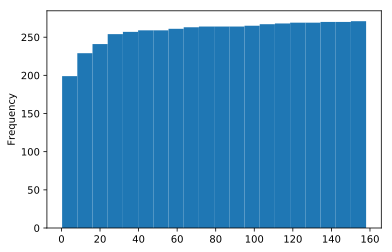

In [38]:
# put your code here
flint_data['Pb Bottle 1 (ppb) - First Draw'].plot.hist(bins=20, cumulative=True)

Finally, we can use matplotlib directly to make plots if we want.  We can make the same histogram as above by typing:

    plt.hist(flint_data['Pb Bottle 1 (ppb) - First Draw'])
    
Or a scatter plot by typing:

    plt.scatter(x=flint_data['Ward'],y=flint_data['Pb Bottle 1 (ppb) - First Draw'])
    
Note that you have to make sure to explicitly use the sliced `flint_data` data frame when you use pyplot directly!

You can also make many of the other plots you see in the [matplotlib gallery](http://matplotlib.org/gallery.html).  One advantage of using pyplot directly is that you have more control over the details of the plot (axis ticks and labels, etc.); a disadvantage is that you have to be much more explicit about calling the Pandas data frame.

**Question:** Make the above plots using the pyplot commands. Compare this to the result from when you used the Pandas routines. Which do you prefer? What are the pros and cons of each approach? 

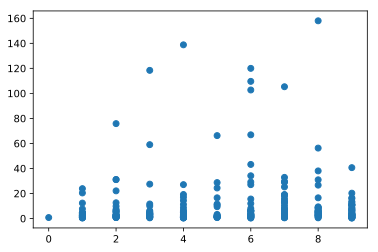

In [41]:
# put your code here
import matplotlib.pyplot as plt

#plt.hist(flint_data['Pb Bottle 1 (ppb) - First Draw'])
plt.scatter(x=flint_data['Ward'],y=flint_data['Pb Bottle 1 (ppb) - First Draw'])


*Put your answers here*
They are both basically the same. it's just a different way of writing it. I guess with the second one you have to import somethting but it's not that great

**Question**: First, a thought exercise: using the data that you've seen so far in class, plus the Pandas and matplotlib visualization tools you've seen so far in class and in the [matplotlib gallery](http://matplotlib.org/gallery.html), what sort of visualizations might be useful to learn more about the Flint water quality problem?

Do you think the a [box plot](https://en.wikipedia.org/wiki/Box_plot) is useful in this context? (both matplotlib has a [boxplot](https://matplotlib.org/examples/pylab_examples/boxplot_demo.html) function and pandas has a [boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) function) **Try one of them out!**

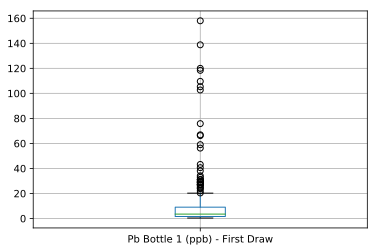

In [50]:
# put your code here!
flint_data.boxplot('Pb Bottle 1 (ppb) - First Draw',grid=True)

**Final Task**: Choose your favorite plot from today's class period and figure out how to save it as a PDF.

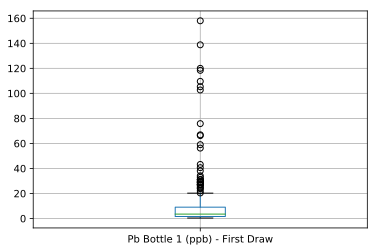

In [62]:
# put your code here!
plot = flint_data.boxplot('Pb Bottle 1 (ppb) - First Draw').get_figure()
plot.savefig("hello.pdf")

---
## Assignment wrapup

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [63]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/Ryfg3XOAi9PAGHgD2" 
	width="800" 
	height="600" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the dropbox link for Day 15, and upload everything there. Make sure your name is on it!